Plots a histogram to visually communicate temperature anomaly of a day's SST

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [12]:
def sst_hist(sst_filename, location):
    all_sst = pd.read_csv(sst_filename, usecols = ['SURF_TEMP_C','SURF_FLAG','MONTH','DAY'])
    #TODO figure out what flags mean
    today = datetime.now()
    day = today.day
    month = today.month
    today_sst = 17.6 #TODO automate, add exception for when data isn't taken
    climatology = all_sst[(all_sst['MONTH'] == month) & (all_sst['DAY'] == day)]

    cm = plt.colormaps.get_cmap('RdBu_r')
    n, bins, patches = plt.hist(climatology.SURF_TEMP_C, bins = 20)
    plt.axvline(today_sst, color='k', linestyle='dashed', linewidth=1)
    plt.xlabel('Temperature (ºC)')
    plt.ylabel('Frequency') #TODO is this axis confusing?
    plt.legend(["Today's Temperature"])
    plt.title('Temperature Distribution of all '+today.strftime("%d %b")+' at '+location) #TODO come up with better title


    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
        
    fig_filename = 'sst_hist'+today.strftime("%m_%d_%Y")+location.replace(' ', '_')+".png"
    plt.savefig(fig_filename)
    plt.show()

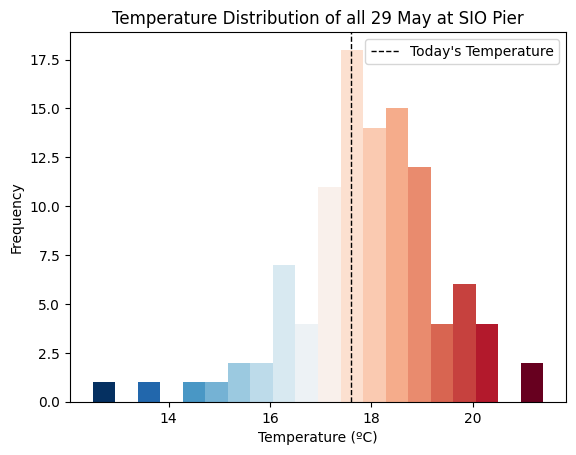

In [13]:
sst_filename='SIO_TEMP_20230105.csv'
location = 'SIO Pier'

sst_hist(sst_filename, location)